### Manifold learning

Study the Tutorial tutorial_manifold_tSNE and the tutorial_manifold_spectral_clustering and the Study_Case_pipeline. Next improve the code by comparing the performance of k-means and spectral clustering. Also compare PCA and t-SNE in the visualization of the result. You can use the pipeline function of scikit-learn and hyperparameter tuning with GridSearchCV. Here's a possible approach:

- Load the dataset to be used for the clustering analysis.
- Preprocess the dataset as needed (e.g., scale the features, normalize the data, etc.).
- Define a pipeline with preprocessing and clustering
- use PCA and t-SNE for dimension reduction and visualize the dimensions, use the clusters to color the datapoints
- use GridSearchCV to optimize the hyper parameters
- Evaluate the performance of the models using a suitable metric
- choose the best cluster method and the best visualization method combination

Explain choises and evaluate outcome. You can do this assignment in pairs but if you do so mention each others name. Do not forget to reference. If you cannot figure out how to use GridSearchCV and or a pipeline, use your own solution


#### the data
The data used is liver data that contains gene expression data of healthy donor liver as well as tumor and paired non-tumor tissue of HCC patients.

CSV file containing the gene expression levels of 22277 genes (columns) from 357 samples (rows). There are 2 different types represented in this dataset (column "type"). More information about this dataset, as well as other file formats such as TAB and ARFF, data visualization, and classification and clustering benchmarks are freely available at the official CuMiDa website http://sbcb.inf.ufrgs.br/cumida

### First part: follow steps from the tutorial manifol tSNE for comparison
First we will load the data and check for missing data and distributions.

In [44]:
import pandas as pd
import numpy as np
import yaml
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
data = pd.read_csv('Liver_GSE14520_U133A.csv')
# with open("config.yaml", 'r') as stream:
#     config = yaml.safe_load(stream)
#     data = pd.read_csv(config['liver'])

In [42]:
data.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
GSM362958.CEL.gz,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,3.654116,3.804983,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
GSM362959.CEL.gz,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,5.137159,8.622475,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
GSM362960.CEL.gz,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,4.515175,12.681439,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
GSM362964.CEL.gz,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,5.192624,11.759412,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
GSM362965.CEL.gz,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,4.961625,10.318552,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [7]:
len(data)

357

In [8]:
set(data.type)

{'HCC', 'normal'}

In [9]:
data['type'].value_counts()

type
HCC       181
normal    176
Name: count, dtype: int64

In [28]:
df = data.set_index('samples')

In [11]:
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,3.654116,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,5.137159,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,4.515175,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,5.192624,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,4.961625,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [29]:
data = df.select_dtypes(include=np.number)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, GSM362958.CEL.gz to GSM712541.CEL.gz
Columns: 22277 entries, 1007_s_at to AFFX-TrpnX-M_at
dtypes: float64(22277)
memory usage: 60.7+ MB


In [14]:
data.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,6.919697,4.364608,3.997815,5.676159,3.196624,5.944732,3.784451,3.535687,5.116819,10.975748,...,11.877943,11.655396,13.102149,12.969547,5.100523,3.625519,4.027291,3.230486,3.202475,3.280976
std,0.795479,0.517078,0.458061,0.324140,0.117558,0.460469,0.223318,0.146379,1.056504,2.707422,...,0.685135,0.704137,0.391878,0.458324,1.340726,0.618638,0.891140,0.166570,0.114835,0.153893
min,5.439881,3.208187,3.349685,4.843217,2.926611,4.408074,3.213066,3.201922,3.093790,3.383942,...,8.974751,8.994940,11.490197,10.867025,3.393593,2.987330,3.052818,2.928648,2.975488,2.973336
25%,6.458913,4.022586,3.756995,5.470514,3.113514,5.691971,3.650583,3.433129,4.387587,10.065293,...,11.490295,11.276094,12.901514,12.733371,3.953988,3.258797,3.426692,3.131927,3.127833,3.177872
50%,6.775267,4.246193,3.898834,5.663660,3.183908,6.013986,3.767319,3.526540,4.993191,12.352463,...,11.925433,11.728519,13.161884,13.023215,4.688599,3.413292,3.679792,3.194545,3.187260,3.243091
75%,7.141789,4.602921,4.125593,5.884673,3.269651,6.240367,3.905954,3.606105,5.772551,12.796926,...,12.352193,12.120636,13.352289,13.248107,6.047752,3.807439,4.318741,3.284613,3.265791,3.341924
max,10.203681,7.118403,8.451671,6.421155,3.624480,7.321780,4.616552,4.123240,8.876519,13.342468,...,13.232389,13.167538,13.880141,13.938760,9.643160,7.774825,8.461628,4.097030,3.763071,3.969724


In [30]:
types = list(df['type'])
df_copy = df.copy()
#df.drop('type', axis=1, inplace=True)

In [31]:
#check for missing data
missing = data.isnull().sum()
#missing[missing > 0]
print(missing.sum())

0


In [32]:
#perform log transformation on skewed_columns
skew_columns = (data.skew().sort_values(ascending = False))
skew_columns = skew_columns[skew_columns > 0.75]
skew_columns
# for col in skew_columns.index.tolist():
#    data[col] = np.log1p(data[col])

204855_at      15.125473
204035_at      14.777678
210246_s_at    14.442801
209125_at      14.263686
204869_at      13.521165
                 ...    
217211_at       0.750525
213335_s_at     0.750407
218370_s_at     0.750348
204691_x_at     0.750134
222001_x_at     0.750026
Length: 12256, dtype: float64

In [33]:
#normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data)

### visualization tSNE

In [34]:
#initiate instance
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', random_state = 42)
#fit 
X_embedded = X_embedded.fit_transform(X)
# produced an two dimension array with x,y features for every row, since n_components = 2
X_embedded.shape

(357, 2)

In [35]:
def plot_data(X, df):
    #add x, y features to the original df
    df['x'] = X[:,0]
    df['y'] = X[:,1]
    sns.scatterplot(x = 'x', y = 'y', hue = 'type', data = df, alpha = 0.5, palette=['red','blue'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

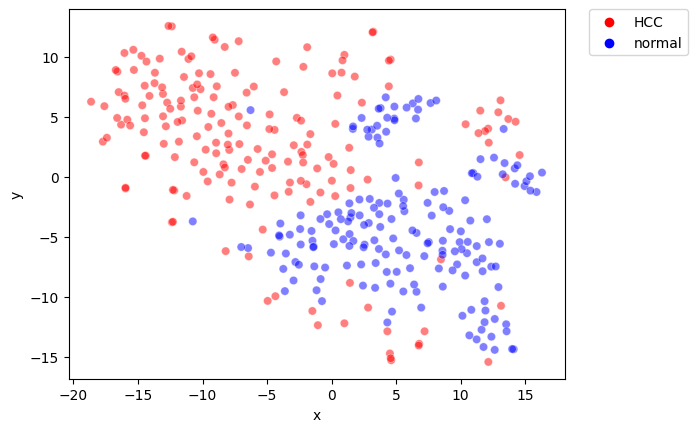

In [39]:
plot_data(X_embedded, df)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pc = pca.fit_transform(X)

In [38]:
#initiate instance
X_embedded1 = TSNE(n_components=2, learning_rate='auto', random_state = 42, init='random')
#fit 
X_embedded1 = X_embedded1.fit_transform(pc)
# produced an two dimension array with x,y features for every row, since n_components = 2
X_embedded1.shape

(357, 2)

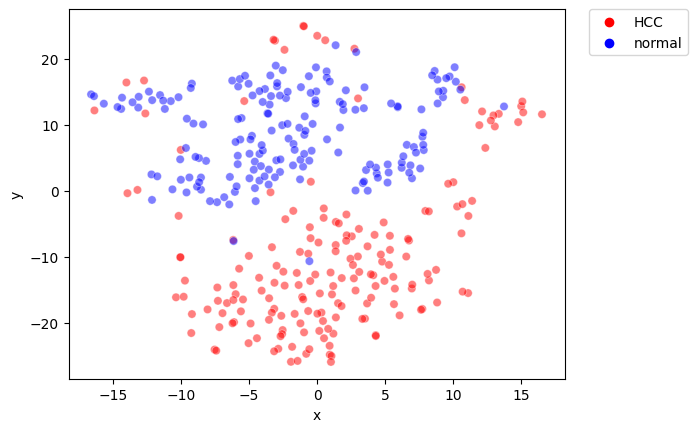

In [40]:
plot_data(X_embedded1, df)

In [ ]:

len(df)**(1/2)

18.894443627691185

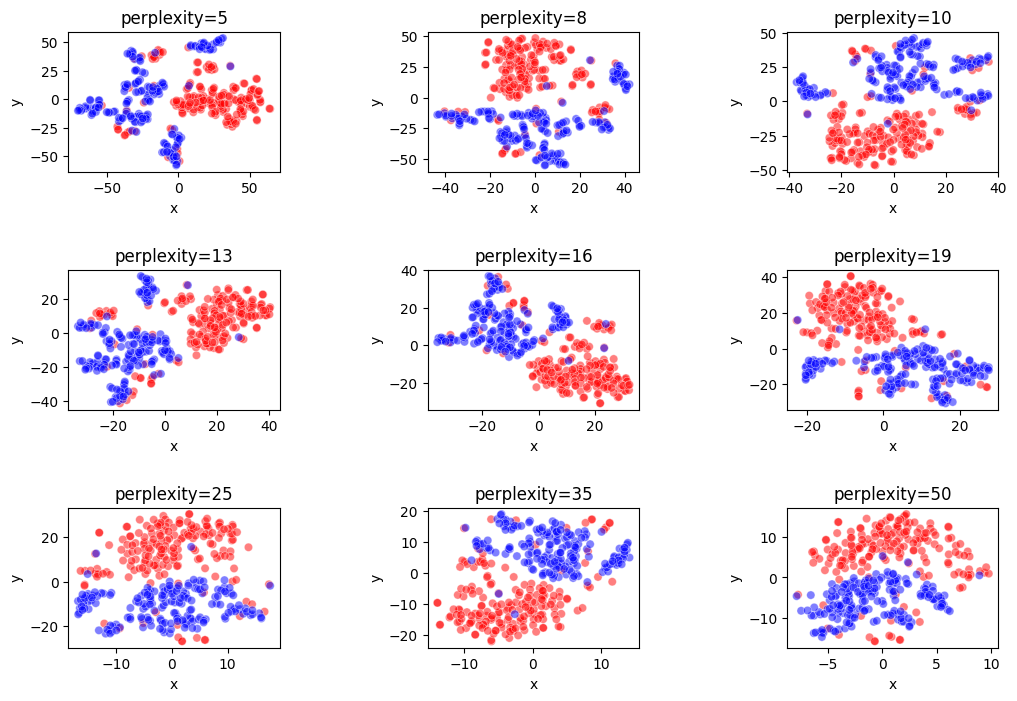

In [41]:
def plot_sub(X, df):
    #add x, y features to the original df
    df['x'] = X[:,0]
    df['y'] = X[:,1]
    ax = sns.scatterplot(x = 'x', y = 'y', hue = 'type', data = df, 
                         legend = False, alpha = 0.5, palette=['red', 'blue'])
    return ax

p = [5, 8, 10, 13, 16, 19, 25, 35, 50]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity = p[i], random_state = 42)
    X_embedded = X_embedded.fit_transform(pc)
    plot_sub(X_embedded, df)
    ax.set_title(f'perplexity={p[i]}')
plt.show()

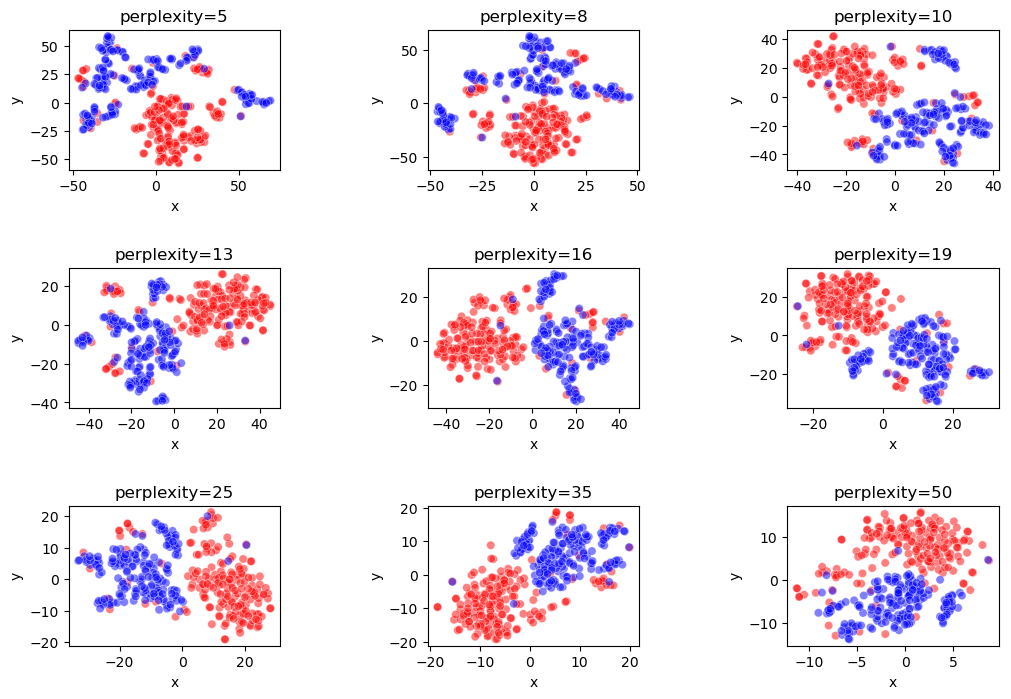

In [ ]:
p = [5, 8, 10, 13, 16, 19, 25, 35, 50]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity = p[i], random_state = 42)
    X_embedded = X_embedded.fit_transform(pc)
    plot_sub(X_embedded, df)
    ax.set_title(f'perplexity={p[i]}')
plt.show()

In [ ]:
#initiate instance
X_embedded = TSNE(n_components=2, 
                  learning_rate='auto', 
                  perplexity = 19, 
                  method='exact', 
                  random_state = 42, 
                  init='random')
#fit 
X_embedded = X_embedded.fit_transform(pc)
# produced an two dimension array with x,y features for every row, since n_components = 2
X_embedded.shape

(357, 2)

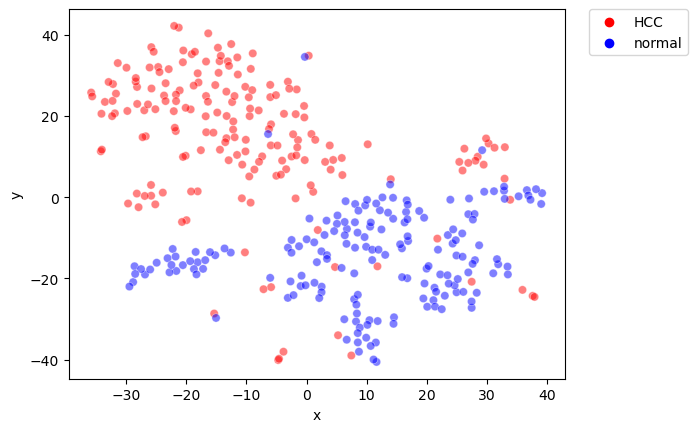

In [ ]:
plot_data(X_embedded, df)

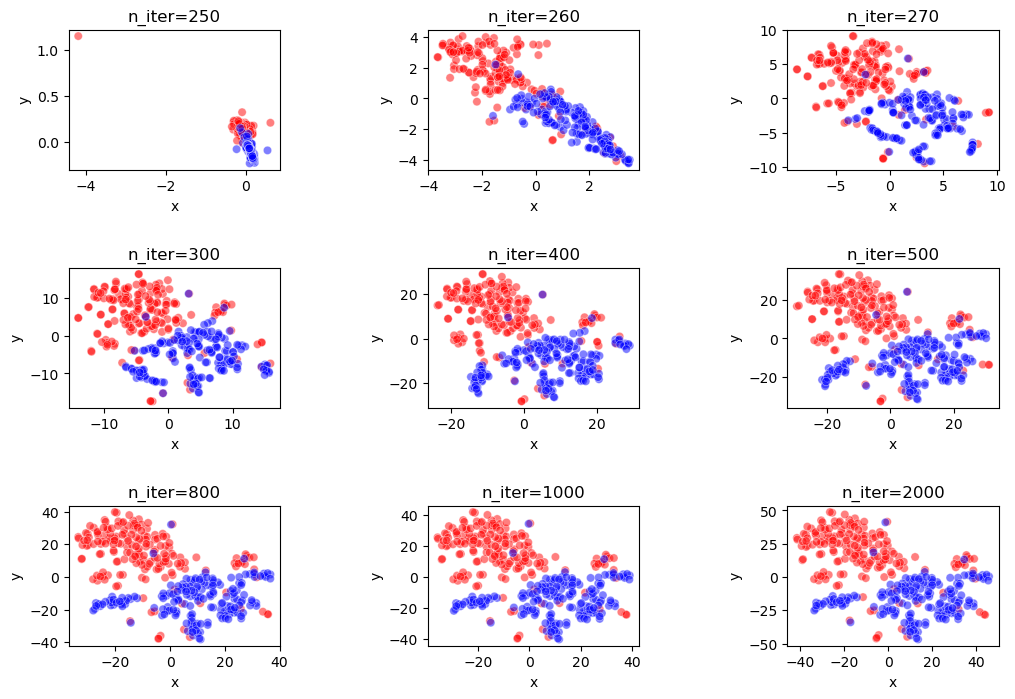

In [ ]:
p = [250, 260, 270, 300, 400, 500, 800, 1000, 2000]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', 
                      perplexity = 19, 
                      random_state = 42, 
                      method = 'exact',
                      n_iter = p[i])
    X_embedded = X_embedded.fit_transform(pc)
    plot_sub(X_embedded, df)
    ax.set_title(f'n_iter={p[i]}')
plt.show()

***

### Improve the code with girdsearch and pipeline

In [45]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [46]:
skew_columns

204855_at      15.125473
204035_at      14.777678
210246_s_at    14.442801
209125_at      14.263686
204869_at      13.521165
                 ...    
217211_at       0.750525
213335_s_at     0.750407
218370_s_at     0.750348
204691_x_at     0.750134
222001_x_at     0.750026
Length: 12256, dtype: float64

In [47]:
skewcol = skew_columns.index.tolist()

In [48]:
rest = list(df.columns.difference(skewcol))

In [ ]:
len(rest)

10022

In [49]:
rest.remove('type')

There is quite the skew in a lot of columns, so we'll do a log transformation

In [50]:
# Create log transfrom and model
log_transform = FunctionTransformer(np.log1p)
model = TSNE(n_components=2, learning_rate='auto',
                   init='random', random_state = 42)

With a Columntransformer you can apply different transformations to columns (log, identity, drop)

In [51]:
#Column transformaer that applies a log_transform on the skewed columns, passes through the rest and drops type
ct = ColumnTransformer(
                       [("log_transform",  log_transform, skewcol),
                        ("identity", "passthrough", rest)
                       ],
                       remainder = "drop")

In [ ]:
#Create a pipeline that dus the transformation, scales the data and then applies the tsne model
pipe1 = Pipeline([('transform', ct), ('scaler', StandardScaler()),
                 ('model', model)])

In [ ]:
results = pipe1.fit_transform(df)

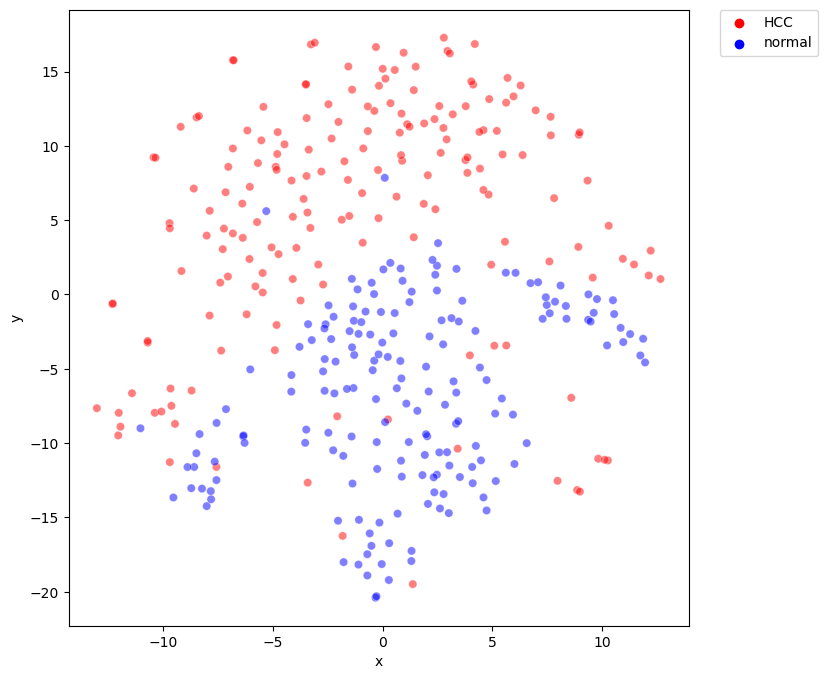

In [ ]:
plot_data(results, df)

Seems similar to the plot made earlier with tSNE. The pipeline works

#### PCA - tSNE

Curiosity, what would happen is you did both pca and tSNE.

In [79]:
pipe = Pipeline([('transform', ct), ('scaler', StandardScaler()), ('pca', pca),
                 ('model', model)])

In [80]:
results1 = pipe.fit_transform(df)

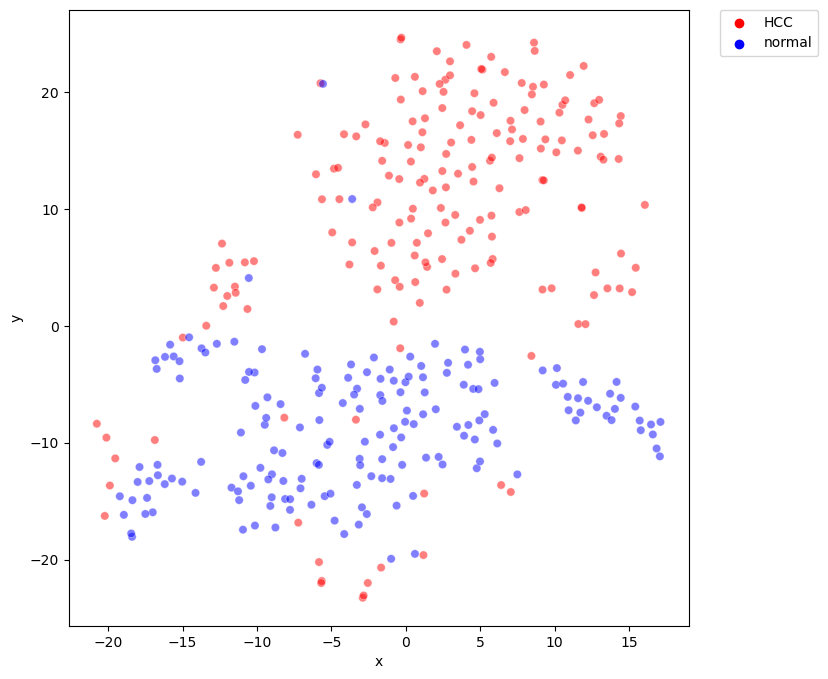

In [81]:
plot_data(results1, df)

Results look quite similar. There seem to be forming clusters/groups with HCC and Normal. In matter of seperation it looks quite the same.

In [ ]:
data.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
GSM362958.CEL.gz,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,3.654116,3.804983,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
GSM362959.CEL.gz,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,5.137159,8.622475,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
GSM362960.CEL.gz,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,4.515175,12.681439,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
GSM362964.CEL.gz,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,5.192624,11.759412,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
GSM362965.CEL.gz,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,4.961625,10.318552,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


### GridSearch

In order the tune the hyper parameters you need to know the parameter names within the pipeline

In [31]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scoremethod = 'homogeneity_score'

In [32]:
tsne = TSNE()

In [33]:
pipe_grid = Pipeline([('transform', ct), ('scaler', StandardScaler()), ('tSNE', tsne)])

In [ ]:
list(pipe_grid.get_params().keys())

['memory',
 'steps',
 'verbose',
 'transform',
 'scaler',
 'tSNE',
 'transform__n_jobs',
 'transform__remainder',
 'transform__sparse_threshold',
 'transform__transformer_weights',
 'transform__transformers',
 'transform__verbose',
 'transform__verbose_feature_names_out',
 'transform__log_transform',
 'transform__identity',
 'transform__log_transform__accept_sparse',
 'transform__log_transform__check_inverse',
 'transform__log_transform__feature_names_out',
 'transform__log_transform__func',
 'transform__log_transform__inv_kw_args',
 'transform__log_transform__inverse_func',
 'transform__log_transform__kw_args',
 'transform__log_transform__validate',
 'scaler__copy',
 'scaler__with_mean',
 'scaler__with_std',
 'tSNE__angle',
 'tSNE__early_exaggeration',
 'tSNE__init',
 'tSNE__learning_rate',
 'tSNE__method',
 'tSNE__metric',
 'tSNE__metric_params',
 'tSNE__min_grad_norm',
 'tSNE__n_components',
 'tSNE__n_iter',
 'tSNE__n_iter_without_progress',
 'tSNE__n_jobs',
 'tSNE__perplexity',
 't

In [ ]:
param_grid = {'tSNE__perplexity': np.arange(5, 50, 1),
              'tSNE__method': ['barnes_hut', 'exact'],
              'tSNE__n_iter': np.arange(250, 500, 50)}

In [ ]:
grid = GridSearchCV(pipe_grid, param_grid, cv=5, n_jobs=-1, scoring='homogeneity_score')

In [ ]:
#grid.fit(df)

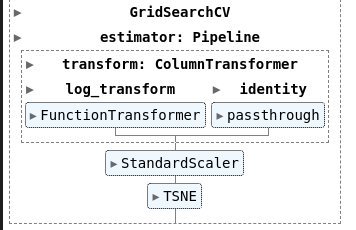

In [ ]:
#print('best score: ', grid.best_score_)
#output: best score:  nan

best score:  nan


In [ ]:
#best_params = grid.best_params_
#best_params
#ouput: {'tSNE__method': 'barnes_hut', 'tSNE__n_iter': 250, 'tSNE__perplexity': 5}

{'tSNE__method': 'barnes_hut', 'tSNE__n_iter': 250, 'tSNE__perplexity': 5}

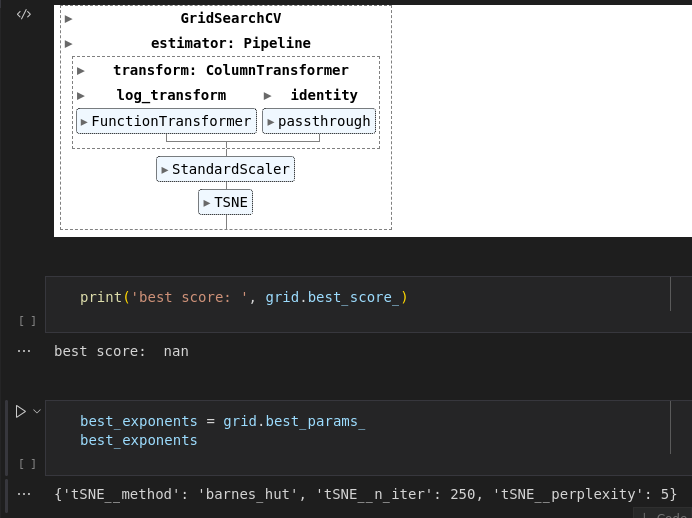

Gridsearch did not seem to work. After a long time it gave back the loweset values from the parameter grid.

In [ ]:
# model = TSNE(n_components=2, learning_rate='auto',
#                    init='random', random_state = 42)

__Trying a different scoring method__

In [ ]:
grid_search = GridSearchCV(pipe_grid, param_grid, cv=5, n_jobs=-1, scoring='adjusted_rand_score')

In [ ]:
#grid_search.fit(df)

UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. <br>Details: 
Traceback (most recent call last):
  File "/commons/conda/dsls/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)<br>
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'
<br>

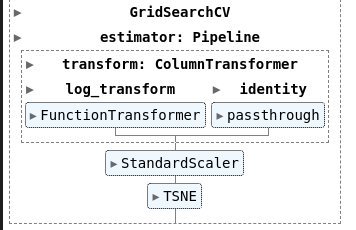

In [ ]:
#best_params = grid_search.best_params_
#best_params

# output: {'tSNE__method': 'barnes_hut', 'tSNE__n_iter': 250, 'tSNE__perplexity': 5}

{'tSNE__method': 'barnes_hut', 'tSNE__n_iter': 250, 'tSNE__perplexity': 5}

Got the same problem with different scoring methods, so that was not it.

***

### More trying out with different steps in the pipeline

In [ ]:
model = TSNE(n_components=2, learning_rate='auto',
                   init='random', random_state = 42)

In [ ]:
pipe_grid = Pipeline([('transform', ct), ('scaler', StandardScaler()),('pca', pca), ('tSNE', model)])

In [ ]:
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,x,y
samples,,,,,,,,,,,,,,,,,,,,,
GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,3.654116,...,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417,31.125511,13.560979
GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,5.137159,...,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348,35.931057,14.981241
GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,4.515175,...,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024,35.494568,16.482004
GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,5.192624,...,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499,33.689625,11.304499
GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,4.961625,...,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938,37.024189,13.655442


In [ ]:
pipe_grid.fit(X, y)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['204855_at', '204035_at',
                                                   '210246_s_at', '209125_at',
                                                   '204869_at', '217109_at',
                                                   '219106_s_at', '201884_at',
                                                   '204870_s_at', '206773_at',
                                                   '204697_s_at', '219196_at',
                                                   '204268_at', '205825_at',
                                                   '209720_s_at', '204260_at',
                                                   '217568_at', '211276_at',
                                                   '214...
                                                   '200000_s_at', '200001_at',
                                                   '200002_at', '200003_s_at',
                                                   '200004_at', '200005_at',
                                                   '200006_at', '200007_at',
                                                   '200008_s_at', '200009_at',
                                                   '200010_at', '200011_s_at',
                                                   '200012_x_at', '200013_at',
                                                   '200014_s_at', '200015_s_at',
                                                   '200016_x_at', '200017_at', ...])])),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=50)),
                ('tSNE',
                 TSNE(init='random', learning_rate='auto', random_state=42))])

In [ ]:
grid_search = GridSearchCV(pipe_grid, param_grid, cv=5, n_jobs=-1, scoring='adjusted_rand_score')

In [ ]:
#grid_search.fit(X, y)


UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. <br>
Traceback (most recent call last): <br>
... <br>
AttributeError: 'TSNE' object has no attribute 'predict' <br>
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn( <br>
  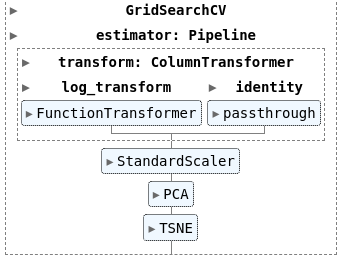


In [ ]:
#best_exponents = grid_search.best_params_
#best_exponents
#output: {'tSNE__method': 'barnes_hut', 'tSNE__n_iter': 250, 'tSNE__perplexity': 5}

{'tSNE__method': 'barnes_hut', 'tSNE__n_iter': 250, 'tSNE__perplexity': 5}

Still, not working here. Figured I would check what would happen if you use these parameters and plot them.

Implement the parameters from the gridsearch

In [83]:
model1 = TSNE(n_components=2, learning_rate='auto',
                   init='random', random_state = 42, perplexity=5, n_iter=250, method='barnes_hut')

In [84]:
final_pipe = Pipeline([('transform', ct), ('scaler', StandardScaler()),('pca', pca), ('tSNE', model1)])

In [85]:
results2 = final_pipe.fit_transform(df)

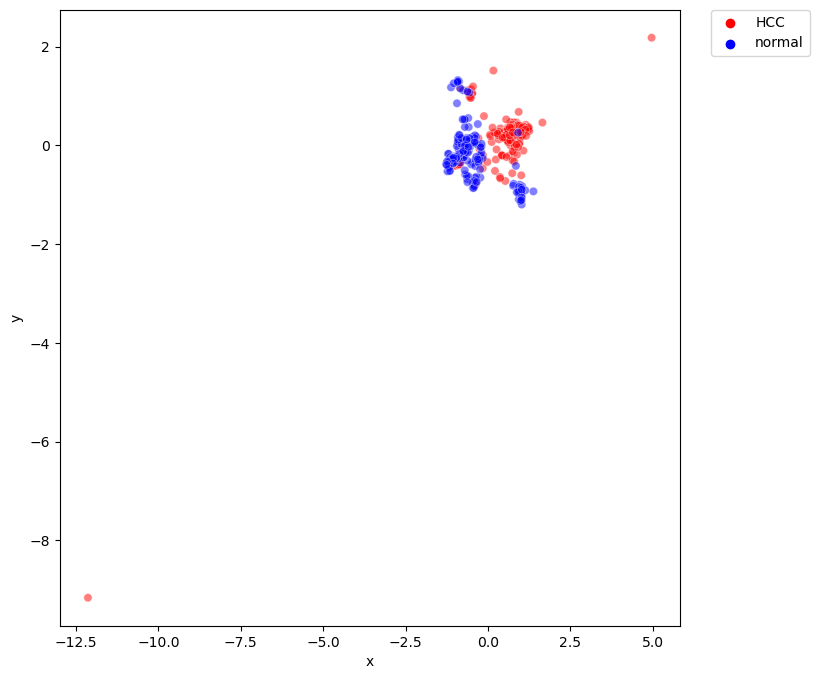

In [86]:
plot_data(results2, df)

It looks very similar to one of the plots with a very low iter from earlier. Clearly seperation is not good.

#### Test kmeans

Here I got quite desperate with making gridsearch work with tSNE and pCA. So, added the KMeans as a model and tried that.

In [52]:
from sklearn.cluster import KMeans
kmean_pipe = Pipeline([('transform', ct), ('scaler', StandardScaler()),('pca', pca), ('kmeans', KMeans())])

In [ ]:
list(kmean_pipe.get_params().keys())

['memory',
 'steps',
 'verbose',
 'transform',
 'scaler',
 'pca',
 'kmeans',
 'transform__n_jobs',
 'transform__remainder',
 'transform__sparse_threshold',
 'transform__transformer_weights',
 'transform__transformers',
 'transform__verbose',
 'transform__verbose_feature_names_out',
 'transform__log_transform',
 'transform__identity',
 'transform__log_transform__accept_sparse',
 'transform__log_transform__check_inverse',
 'transform__log_transform__feature_names_out',
 'transform__log_transform__func',
 'transform__log_transform__inv_kw_args',
 'transform__log_transform__inverse_func',
 'transform__log_transform__kw_args',
 'transform__log_transform__validate',
 'scaler__copy',
 'scaler__with_mean',
 'scaler__with_std',
 'pca__copy',
 'pca__iterated_power',
 'pca__n_components',
 'pca__n_oversamples',
 'pca__power_iteration_normalizer',
 'pca__random_state',
 'pca__svd_solver',
 'pca__tol',
 'pca__whiten',
 'kmeans__algorithm',
 'kmeans__copy_x',
 'kmeans__init',
 'kmeans__max_iter',
 '

In [88]:
paramgrid = {'kmeans__random_state': np.arange(20, 50, 5),
             'kmeans__n_clusters': np.arange(1, 10, 1),
             "kmeans__init": ['k-means++', 'random']}

In [47]:
gridsearch = GridSearchCV(kmean_pipe, param_grid=paramgrid, cv=10, n_jobs=-1)

In [48]:
gridsearch.fit(df)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('log_transform',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['204855_at',
                                                                          '204035_at',
                                                                          '210246_s_at',
                                                                          '209125_at',
                                                                          '204869_at',
                                                                          '217109_at',
                                                                          '219106_s_at',
                                                                          '201884_at',
                                                                          '204870_s_at',
                                                                          '206773_at',
                                                                          '204697_s_at',
                                                                          '219196_at',
                                                                          '204268_at',
                                                                          '205825_at',
                                                                          '209720_s_at',
                                                                          '204260_at'...
                                                                          '200010_at',
                                                                          '200011_s_at',
                                                                          '200012_x_at',
                                                                          '200013_at',
                                                                          '200014_s_at',
                                                                          '200015_s_at',
                                                                          '200016_x_at',
                                                                          '200017_at', ...])])),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=50)),
                                       ('kmeans', KMeans())]),
             n_jobs=-1,
             param_grid={'kmeans__init': ['k-means++', 'random'],
                         'kmeans__n_clusters': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kmeans__random_state': array([20, 25, 30, 35, 40, 45])})

In [157]:
best_param = gridsearch.best_params_
best_param
# {'kmeans__init': 'random', 'kmeans__n_clusters': 9, 'kmeans__random_state': 45}

{'kmeans__init': 'random', 'kmeans__n_clusters': 9, 'kmeans__random_state': 45}

At first I was really surprised this did work. However, later I realised that I was trying to use Gridsearch on dimensionality reduction techniques and that this would not work. We were meant to do it on the kmeans, which makes way more sense thinking about it. <br>
Also, with two distinct groups to cluster by it surprised me that it suggested to use 9 clusters instead of 2.

In [53]:
resultskmean = kmean_pipe.fit_transform(df)
resultskmean

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[233.00587563, 118.75739401, 170.35924763, ..., 169.83567489,
        115.17320133, 157.47141257],
       [217.90797904, 145.447082  , 160.71317404, ..., 160.00809381,
        123.04006251, 162.68135057],
       [228.6103499 , 177.10121747, 176.2197218 , ..., 175.99757677,
        150.26680921, 189.63145044],
       ...,
       [243.29957498,  98.98872328, 185.35814748, ..., 166.58006696,
        112.11041251, 136.90222106],
       [219.5820227 , 111.82909435, 132.65937368, ...,  77.08342477,
        112.90575367,  57.37933256],
       [218.63922778, 119.25218748, 111.36502902, ...,  99.40935906,
        124.92254081,  71.25846538]])

##### plot default kmeans pipeline

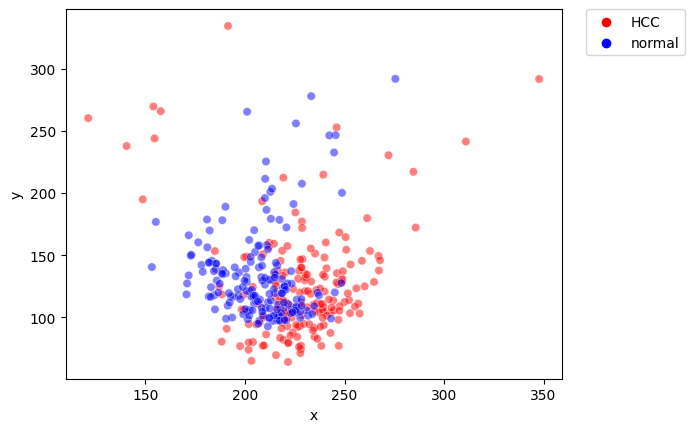

In [54]:
plot_data(resultskmean, df)

Interestingly enough within this pipeline with PCA and KMeans, there seems to be quite the overlap between the clusters.

Update the KMean model with the tuned parameters and plot the results:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


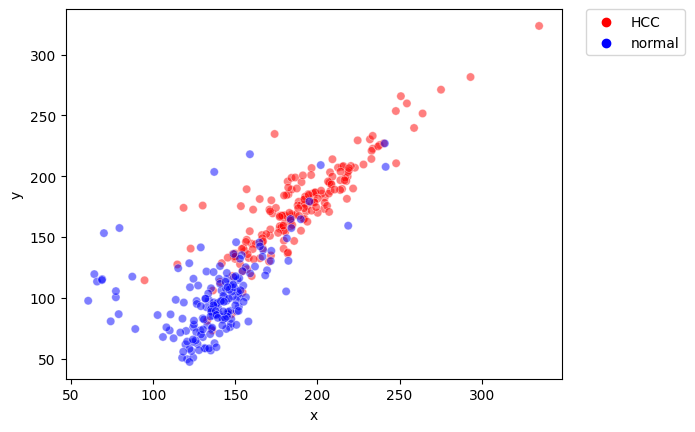

In [61]:
kmean_pipe1 = Pipeline([('transform', ct), ('scaler', StandardScaler()),('pca', pca), ('kmeans', KMeans(init='random', n_clusters=9, random_state=45))])
resultskmean1 = kmean_pipe1.fit_transform(df)
plot_data(resultskmean1, df)

There seems to be still overlap between the clusters, but now less than before.

Did not expect the x-axis, so tried to see if different visualization made a difference.
(from E_k-means.ipynb)

In [63]:
import matplotlib.colors as mcolors
plt.rcParams['figure.figsize'] = [8,8]
def display_cluster(X,km,num_clusters, ax=plt):
    """
    function that plot the clusters by giving each datapoint in the cluster a color 
    and furthermore the centroid of the cluster is plotted
    parameters
    X: input matrix with features and observations
    km: fitted model with the labels for each datapoint and the centroids (km.labels_, km.centers_)
    num_clusters: the number of clusters to display
    ax: either plot or subplot location
    """
    #color = 'brgcmkyw'
    color = list(mcolors.TABLEAU_COLORS.values())
    for i in range(num_clusters):
        #plot the datapoints in the color of the label
        ax.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = 0.4, s = 10)
        #plot the centroid
        ax.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], 
                    marker = '^', s = 300, alpha = 1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


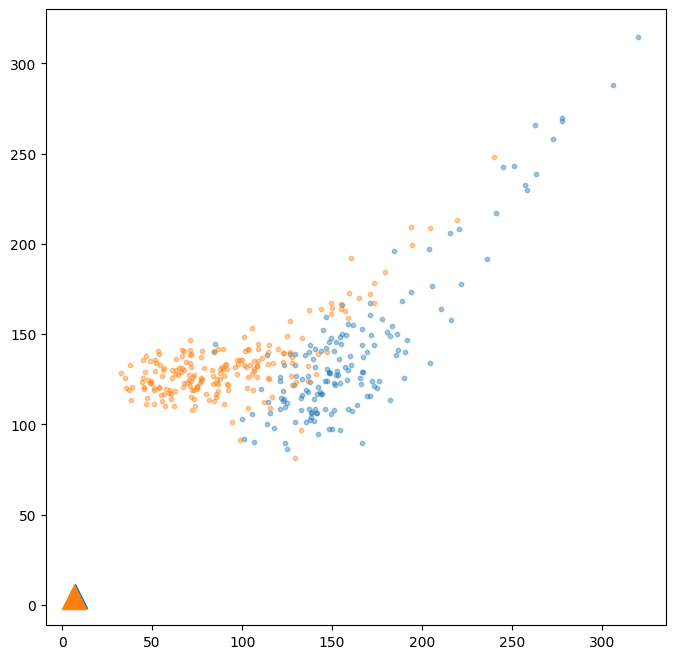

In [70]:
import matplotlib.colors as mcolors
num_clusters = 2
km = KMeans(n_clusters=num_clusters, random_state=45, init='random')
df1 =df.drop('type', axis =1)
km.fit(df1)
display_cluster(resultskmean, km, num_clusters)

Gives the same type of plot. But thought here that there is a kmeans within the pipeline and later you fit another on it, so that could possibly be why?

Eliminating the possible use of a double kmeans?

In [66]:
update_kmean = Pipeline([('transform', ct), ('scaler', StandardScaler()),('pca', pca)])

In [67]:
result_kmean = update_kmean.fit_transform(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


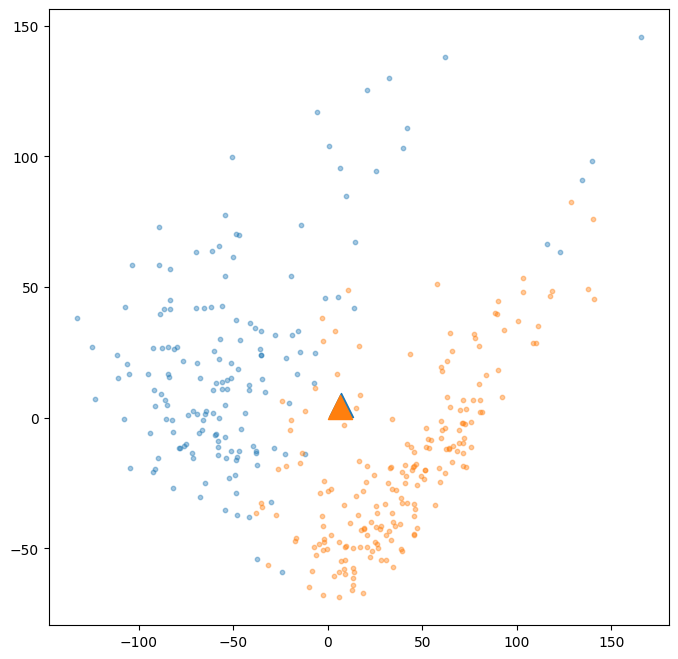

In [81]:
import matplotlib.colors as mcolors
num_clusters = 2
km = KMeans(n_clusters=num_clusters, random_state=45, init='random')
km.fit(df1)
display_cluster(result_kmean, km, num_clusters)

Axis for x and y now seem to be similar compared to the plots from the tutorial. Cannot really explain as to what makes the difference.

Actually there seems to be two groups, so tried a pipeline with two clusters next.

In [75]:
kmean_pipe = Pipeline([('transform', ct), ('scaler', StandardScaler()),('pca', pca), ('kmeans', KMeans(n_clusters=2, random_state=45, init='random'))])

In [122]:
kmean2 = kmean_pipe.fit_transform(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [123]:
kmean2.shape

(357, 2)

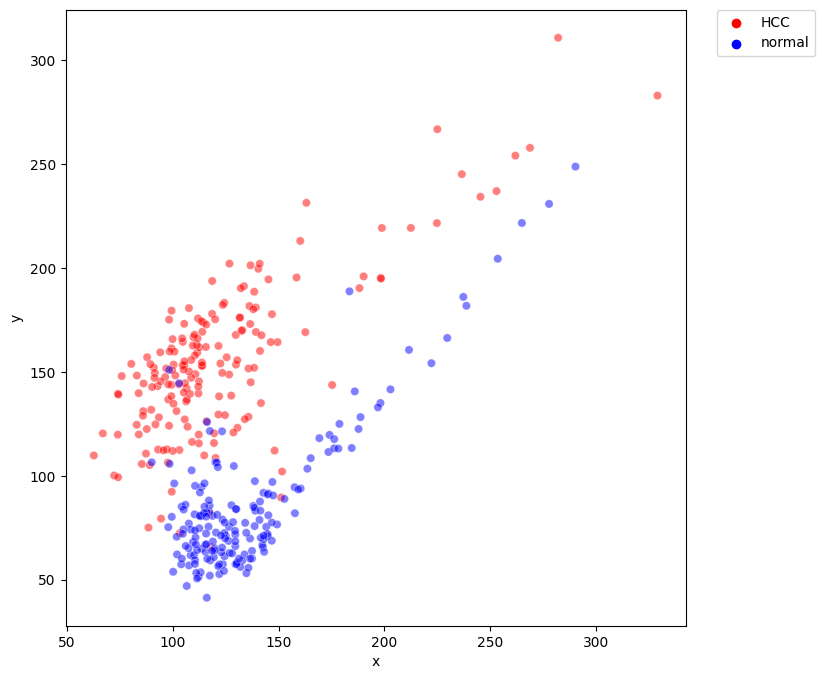

In [124]:
plot_data(kmean2, df)

Seperation with two clusters seems to be better than with 9 clusters.
Overall, Gridsearch is an good tool to tune for hyperparameters. However, the given suggestions might still not be the best. It also depends on the ohter parameters you have in the grid.

### Extra

Tried to do it for tSNE, but gives errors for All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' and tSNE doesn't. (for either a default tsne model or with set parameters) <br>
tSNE does have a fit_transform option, so seems unlikely that is the problem.
However it does not have both a fit AND transform option like PCA for example. So this still could give problems

In [91]:
tsne = TSNE(n_components=2, 
                  learning_rate='auto', 
                  perplexity = 19, 
                  method='exact', 
                  random_state = 42, 
                  init='random')

In [115]:
prep_pipe = Pipeline([('transform', ct), ('scaler', StandardScaler()), ('tsne', tsne)])
#prep1 = prep_pipe.fit_transform(df)

In [116]:
tsne_pipe = Pipeline([('prep', prep_pipe), ('kmeans', KMeans(n_clusters=2, random_state=45, init='random'))])

In [ ]:
tsne = tsne_pipe.fit_transform(df)